In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

### importando os csvs

In [2]:
# https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv
atletas = pd.read_csv('/home/dcezar/datascience/data/olimpiadas/athlete_events.csv')

In [3]:
noc = pd.read_csv('/home/dcezar/datascience/data/olimpiadas/noc_regions.csv')

### Conhecendo a estrutura do conjunto dados

In [4]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Verificando missing data

In [6]:
atletas.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
noc.isna().sum()

NOC         0
region      3
notes     209
dtype: int64

In [8]:
# biblioteca para visualizar dados ausentes
import missingno as msno

<AxesSubplot:>

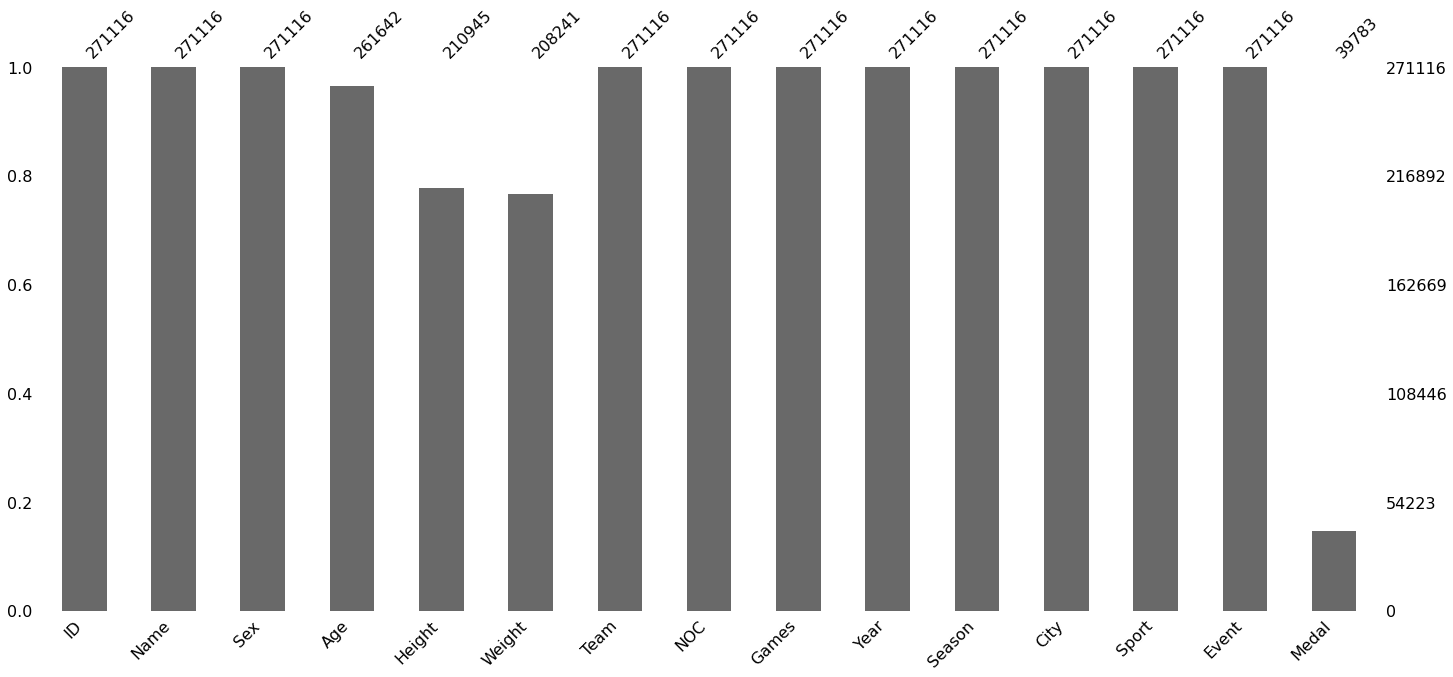

In [9]:
msno.bar(atletas)

<AxesSubplot:>

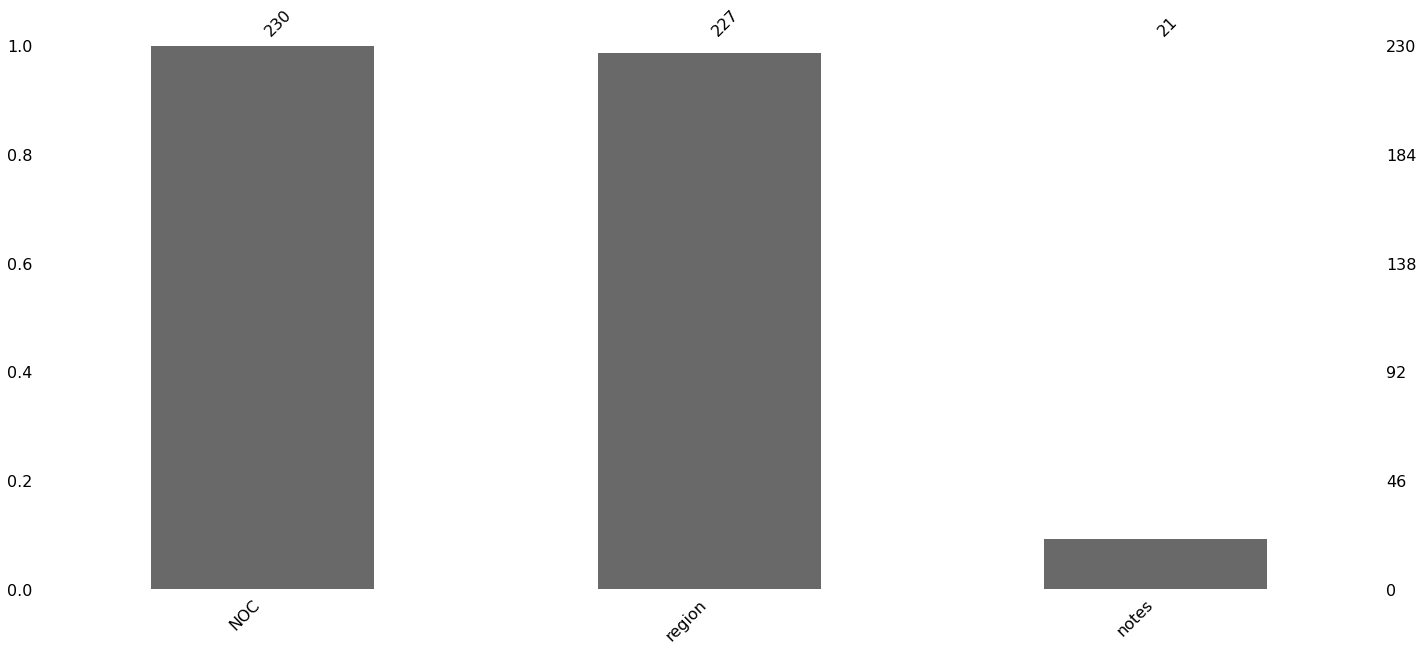

In [10]:
msno.bar(noc)

### estatisticas descritivas

In [11]:
atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [14]:
atletas[atletas['Age'] == 10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [15]:
noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,JAM,Germany,United Arab Republic
freq,1,4,1


In [18]:
rio2016 = atletas[atletas['Year'] == 2016]

In [22]:
rio2016.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
143,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,NaN
144,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
148,55,Antonio Abadia Beci,M,26.0,170.0,65.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NaN
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze


### quantas medalhas tiveram no rio2016

In [23]:
rio2016['Medal'].count()

2023

### quantas medalhas por tipode medalha teve em 2016

In [31]:
#rio2016.groupby('Medal')['Medal'].count()
rio2016['Medal'].value_counts()

Bronze    703
Gold      665
Silver    655
Name: Medal, dtype: int64

### quantas medalhas por atletas teve no rio 2016

In [33]:
#rio2016.groupby(['Name','Medal'])['Medal'].count().sort_values(ascending=False)
rio2016[['Name', 'Medal']].value_counts()

Name                                Medal 
Michael Fred Phelps, II             Gold      5
Simone Arianne Biles                Gold      4
Kathleen Genevieve "Katie" Ledecky  Gold      4
Katinka Hossz                       Gold      3
Ryan Murphy                         Gold      3
                                             ..
Henrik Mllgaard Jensen              Gold      1
Henri Schoeman                      Bronze    1
Henri Junghnel                      Gold      1
Hendrik Pekeler                     Bronze    1
scar Albeyro Figueroa Mosquera      Gold      1
Length: 1944, dtype: int64

### distribuição de medalhas por esporte e pais

In [45]:
#rio2016[['Sport','Medal']].value_counts()
rio2016[rio2016['Medal'].notnull()].groupby(['NOC','Sport','Medal'])['Medal'].count().sort_values( ascending=False)

NOC  Sport       Medal 
USA  Swimming    Gold      48
GER  Hockey      Bronze    33
FRA  Handball    Silver    31
USA  Athletics   Gold      27
     Basketball  Gold      24
                           ..
KOR  Judo        Bronze     1
     Golf        Gold       1
     Fencing     Gold       1
                 Bronze     1
VIE  Shooting    Silver     1
Name: Medal, Length: 620, dtype: int64

### medalhas por pais/sport/evento-modalidade

In [46]:
rio2016[rio2016['Medal'].notnull()].groupby(['NOC','Sport','Medal'])[['Event']].nunique()

Event
NOC Sport     Medal        
ALG Athletics Silver      2
ARG Hockey    Gold        1
    Judo      Gold        1
    Sailing   Gold        1
    Tennis    Silver      1
...                     ...
VEN Athletics Silver      1
    Boxing    Bronze      1
    Cycling   Bronze      1
VIE Shooting  Gold        1
              Silver      1

[620 rows x 1 columns]

In [48]:
medalhas = atletas.groupby(['NOC','Event','Medal']).nunique().index

### qual pais ganhou mais medalhas por evento

In [49]:
medalhas = medalhas.to_frame()

In [50]:
medalhas.head()

NOC                          Event  \
NOC Event                         Medal                                        
AFG Taekwondo Men's Featherweight Bronze  AFG  Taekwondo Men's Featherweight   
    Taekwondo Men's Flyweight     Bronze  AFG      Taekwondo Men's Flyweight   
AHO Sailing Mixed Windsurfer      Silver  AHO       Sailing Mixed Windsurfer   
ALG Athletics Men's 1,500 metres  Gold    ALG   Athletics Men's 1,500 metres   
                                  Silver  ALG   Athletics Men's 1,500 metres   

                                           Medal  
NOC Event                         Medal           
AFG Taekwondo Men's Featherweight Bronze  Bronze  
    Taekwondo Men's Flyweight     Bronze  Bronze  
AHO Sailing Mixed Windsurfer      Silver  Silver  
ALG Athletics Men's 1,500 metres  Gold      Gold  
                                  Silver  Silver

In [51]:
medalhas = medalhas.reset_index(drop=True)

In [52]:
medalhas.head()

,NOC,Event,Medal
0,AFG,Taekwondo Men's Featherweight,Bronze
1,AFG,Taekwondo Men's Flyweight,Bronze
2,AHO,Sailing Mixed Windsurfer,Silver
3,ALG,"Athletics Men's 1,500 metres",Gold
4,ALG,"Athletics Men's 1,500 metres",Silver


# pivotando os dados

In [53]:
medalhas.pivot_table(values='NOC', index='Event', columns='Medal', aggfunc='first')

Medal,Bronze,Gold,Silver
Event,,,
Aeronautics Mixed Aeronautics,NaN,SUI,NaN
Alpine Skiing Men's Combined,AUT,AUT,AUT
Alpine Skiing Men's Downhill,AUT,AUT,AUT
Alpine Skiing Men's Giant Slalom,AUT,AUT,AUT
Alpine Skiing Men's Slalom,AUT,AUT,AUT
...,...,...,...
"Wrestling Women's Flyweight, Freestyle",AZE,CAN,AZE
"Wrestling Women's Heavyweight, Freestyle",CHN,CAN,BUL
"Wrestling Women's Light-Heavyweight, Freestyle",KAZ,JPN,RUS


### analisar quem ganhou medalha de ouro

In [54]:
gold = atletas[atletas['Medal']=='Gold'].copy()

In [55]:
gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


<AxesSubplot:>

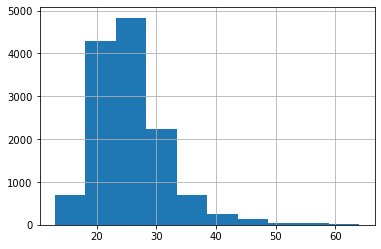

In [56]:
# distribuição da idade
gold['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

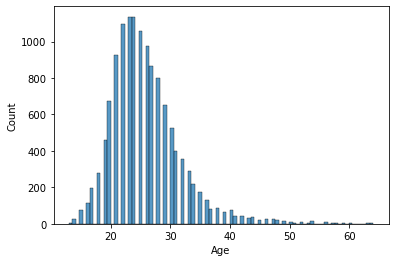

In [63]:
sns.histplot(gold['Age'])